In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,dct
import librosa
from scipy import signal
import librosa.display
import soundfile as sf
import sounddevice as sd

import librosa.display
import matplotlib.pyplot as plt

### 1. Constant-Q spectrogram and chromagram (1 point)

#### a) Load 'brahms_hungarian_dance_5_short.wav'

In [28]:
audio_path = "brahms_hungarian_dance_5_short.wav" 
audio, sr = librosa.load(audio_path, sr=None)

#### b) Calculate the spectrogram

In [29]:
D = librosa.core.stft(audio, n_fft=2048, hop_length=512)
# Convert to magnitude spectrogram in decibels (dB) for visualization
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

#### c) Calculate the constant-Q spectrogram

In [30]:
CQT = librosa.core.cqt(audio, sr=sr)
CQT_db = librosa.amplitude_to_db(np.abs(CQT), ref=np.max)

#### d) Calculate the chromagram

In [31]:
chroma = librosa.feature.chroma_stft(y=audio, sr=sr)

#### e) Plot, observe and report differences.

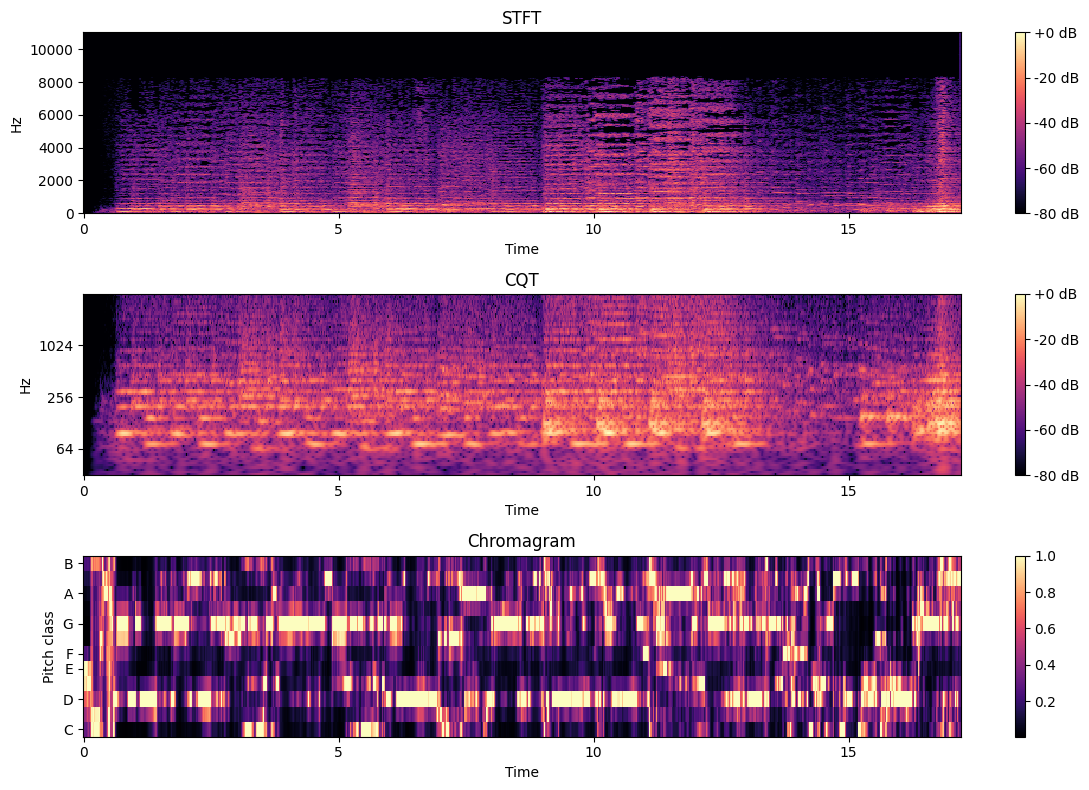

In [51]:
# Plot
# 1: Spectrogram (STFT)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT')
plt.tight_layout()

# 2: Constant-Q Spectrogram (CQT)
plt.subplot(3, 1, 2)
librosa.display.specshow(CQT_db, sr=sr, x_axis='time', y_axis='cqt_hz')
plt.colorbar(format='%+2.0f dB')
plt.title('CQT')
plt.tight_layout()

# 3: Chromagram
plt.subplot(3, 1, 3)
librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

plt.show()


### <font color='#A52A2A'> 1. My Observations


**1. Spectrogram:** The STFT spectrogram shows a full visual picture of the sound’s frequency energy over time. I notice that the low and mid frequencies contain strong harmonic content, while high frequencies look more noisy and less structured. Transients appear as sharp vertical lines, and sustained tones form horizontal bands. This representation gives the most detailed view of the signal but does not clearly highlight musical notes or chords.

**2. Constant-Q Spectrogram:** In the CQT plot, harmonic structures appear more organized and easier to recognize compared to the STFT. Melodic lines and pitch related patterns are more visible because the frequency axis follows a musical logarithmic scale. I can see clearer separation of notes and better resolution in the lower frequencies. Overall, the CQT highlights musical pitch content much more effectively than the standard spectrogram.

**3. Chromagram:** The chromagram simplifies the audio into pitch classes and removes detailed frequency information. I observe clear repeating patterns that correspond to chords or harmonic changes in the music. Percussive and noisy parts nearly disappear, and only notes remain visible. This representation is the most abstract but makes musical structure, such as key, chords, and tonal changes very easy to see.

### 2. Onset detection (1 point)

#### a.1) load the audio file

In [52]:
audio_path = "classic_rock_beat.wav" 
audio, sr = librosa.load(audio_path, sr=None)

In [53]:
sd.play(audio, sr)

#### a.2) Compute spectral novelty function

In [54]:
o_env = librosa.onset.onset_strength(y=audio, sr=sr)

#### a.3) Pick peaks

In [55]:
onset_frames_default = librosa.util.peak_pick(o_env, pre_max=1, post_max=1, pre_avg=1, post_avg=1, delta=1.5, wait=1)

#### a.4) Convert frame indexes into time indexes

In [56]:
onset_times_default = librosa.frames_to_time(onset_frames_default, sr=sr)

#### a.5) Plot onsets on top of the time domain signal. Report observations.

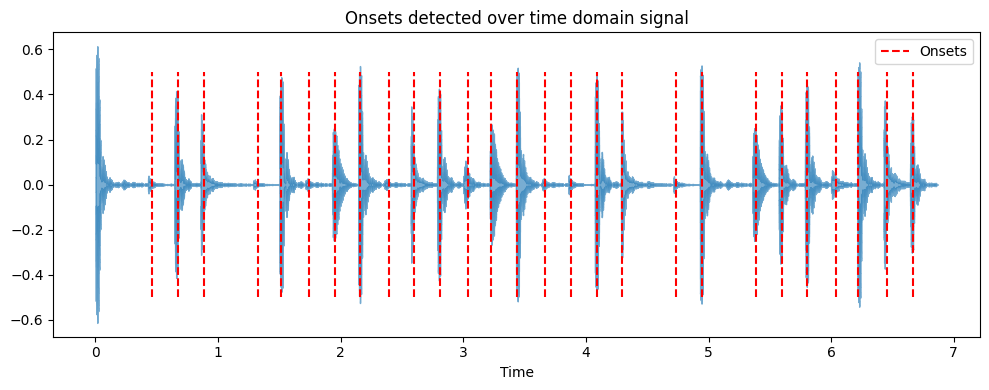

In [57]:


plt.figure(figsize=(10, 4))

librosa.display.waveshow(audio, sr=sr, alpha=0.6) 

plt.vlines(onset_times_default, -0.5, 0.5, color='r', linestyle='--', label='Onsets')
plt.title('Onsets detected over time domain signal')
plt.legend()
plt.tight_layout()
plt.show()

#### a.6) Plot onsets on top of the spectrogram. Report observations.

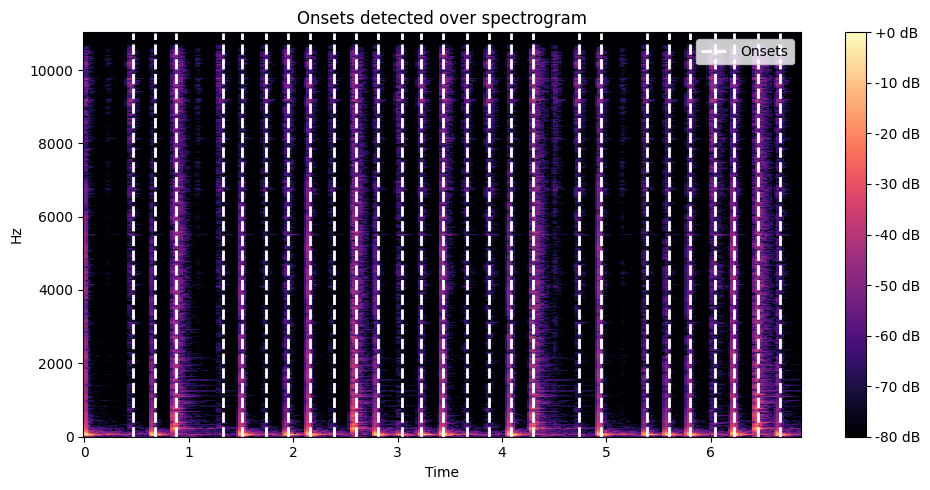

In [58]:
D = librosa.stft(audio)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(10, 5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')

plt.vlines(onset_times_default, 0, sr/2, color='w', linestyle='--', linewidth=2, label='Onsets')

plt.title('Onsets detected over spectrogram')
plt.legend()
plt.tight_layout()
plt.show()

Default Onsets Detected: 27
Strict Onsets Detected (Stricter delta/averaging): 26


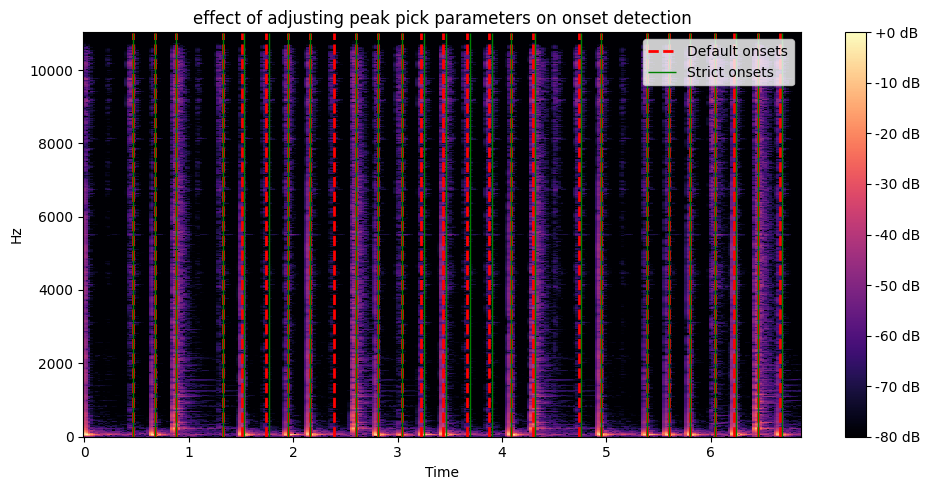

In [59]:
onset_frames_strict = librosa.util.peak_pick(o_env, pre_max=3, post_max=3, pre_avg=5, post_avg=5, delta=5.0, wait=5)
onset_times_strict = librosa.frames_to_time(onset_frames_strict, sr=sr)

print(f"Default Onsets Detected: {len(onset_times_default)}")
print(f"Strict Onsets Detected (Stricter delta/averaging): {len(onset_times_strict)}")

plt.figure(figsize=(10, 5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.vlines(onset_times_default, 0, sr/2, color='r', linestyle='--', linewidth=2, label='Default onsets')
plt.vlines(onset_times_strict, 0, sr/2, color='g', linestyle='-', linewidth=1, label='Strict onsets')
plt.title('effect of adjusting peak pick parameters on onset detection')
plt.legend()
plt.tight_layout()
plt.show()

### <font color='#A52A2A'> 2. My Observations

**Plot 1: Time domain**

The default onsets,red dashed lines, accurately align with the initial, sharp peaks of each rhythmic event in the time domain signal. The default detection method successfully identified the start of each prominent beat.

**Plot 2: Spectrogram**

The spectrogram shows clear vertical columns of high energy corresponding to the rhythmic events. The default onsets, white dashed lines,precisely match these high energy columns. This visually confirms the effectiveness of the default onset detection in the time frequency domain.

**Plot 3: Peak parameters:**

This plot compares default onsets, 27 detected, with strict onsets, 24. The strict onsets were generated by adjusting the peak picking parameters (e.g, increasing the detection threshold or minimum interval). Making the peak picking parameters stricter, less sensitive, resulted in fewer detected onsets (24 vs. 27). This demonstrates how fine tuning the algorithm can filter out weaker or less prominent onset events.


### Add clicks to the onsets

#### b.1) Create a signal consisting of clicks at specified locations.

In [60]:
clicks_signal = librosa.clicks(frames=onset_frames_default, sr=sr, length=len(audio))

#### b.2) Add the two signals together.

In [61]:
music_with_mono_clicks = audio + clicks_signal
music_with_mono_clicks = np.clip(music_with_mono_clicks, -1.0, 1.0)

#### b.2) Play it.

In [62]:
sd.play(music_with_mono_clicks, sr)
sd.wait()

#### b.3) Stack them to create stereo signal.

In [63]:
stereo_signal = np.vstack([audio, clicks_signal]).T

#### b.3) Play it.

In [64]:
sd.play(stereo_signal, sr)
sd.wait()

### Bonus problem: Implement your own spectral novelty function